<a href="https://colab.research.google.com/github/AshfaqSy/100-Days-Of-ML-Code/blob/master/Tensorflow_Basic_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
class_names = ['T-Shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']
train_images.shape
len(train_labels)
train_labels
test_images.shape
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

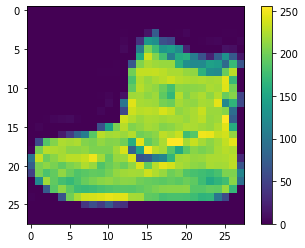

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
train_images = train_images/255.0
test_images = test_images/255.0

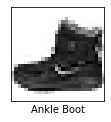

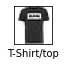

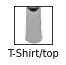

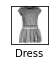

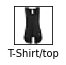

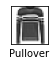

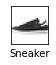

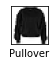

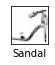

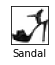

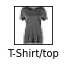

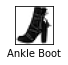

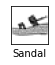

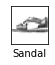

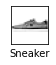

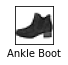

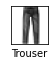

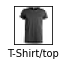

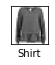

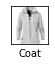

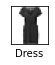

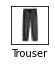

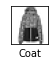

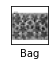

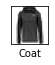

In [ ]:
plt.figure(figsize = (10, 10))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap = plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
  plt.show()

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [ ]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'] )

In [ ]:
#Feeding the model
#model.fit is called to start training
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2307 - accuracy: 0.9133
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2228 - accuracy: 0.9166
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2162 - accuracy: 0.9186
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2113 - accuracy: 0.9213
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2028 - accuracy: 0.9238
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1960 - accuracy: 0.9260
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1929 - accuracy: 0.9269
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1866 - accuracy: 0.9298
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1815 - accuracy: 0.9319
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.177

In [ ]:
#Evaluate Accuracy
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy', test_acc)

313/313 - 1s - loss: 0.3734 - accuracy: 0.8796 - 613ms/epoch - 2ms/step

Test accuracy 0.8795999884605408


In [ ]:
#Make Predicitons
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [ ]:
predictions = probability_model.predict(test_images)
predictions[0]

array([4.2458303e-13, 3.2352504e-12, 4.3210765e-12, 7.9233186e-13,
       4.1012463e-12, 1.5788984e-07, 7.4359553e-11, 5.6411111e-04,
       1.0600943e-14, 9.9943572e-01], dtype=float32)

In [ ]:
np.argmax(predictions[0])

9

In [ ]:
test_labels[0]

9

In [ ]:
#Graph this to look at the full class of ten class predictions

def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid()
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(predictions_array),
                                       class_names[true_label],
                                       color=color))
  
def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color='#777777')
  plt.ylim([0,1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

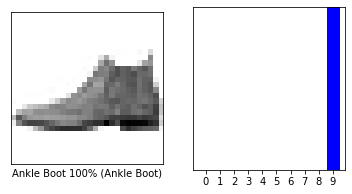

In [ ]:
#Verify predicitons
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

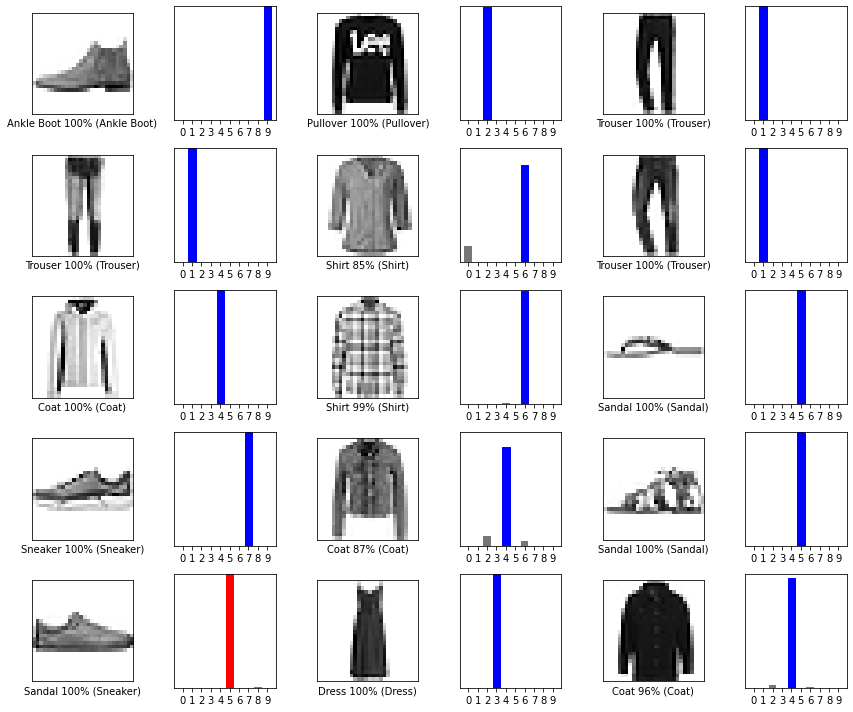

In [ ]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)

plt.tight_layout() 
plt.show() 

(28, 28)
(1, 28, 28)
[[5.0690310e-04 4.3376617e-19 9.9877518e-01 3.4128872e-12 3.6124510e-04
  3.0216788e-12 3.5675906e-04 1.1442639e-21 8.4472583e-14 4.9679812e-25]]


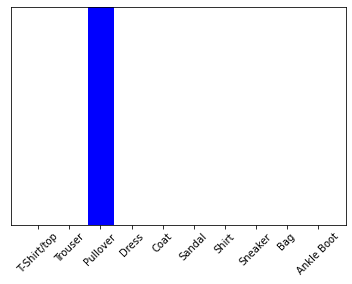

In [ ]:
#Using the trained model

img = test_images[1]
print(img.shape)

img = (np.expand_dims(img,0))
print(img.shape)

predictions_single = probability_model.predict(img)

print(predictions_single)

plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [ ]:
np.argmax(predictions_single[0])

2